In [68]:
import pandas as pd
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [167]:


from typing import List, Dict


class ProcessData:

       def __init__(self, *args, **kwargs):
              self.data_folder_address = Path("__file__").parent / "data" or kwargs.get("data_folder_address")
              self.keep_cols = kwargs.get("keep_cols")

       @property
       def data_file_list(self):
              _list = [file for file in os.listdir(self.data_folder_address)]
              return _list

       def read_data(self, file_name):
              address = self.data_folder_address / file_name
              df = pd.read_csv(address, encoding= 'unicode_escape')
              return df

       def rename_columns(self, df):

              column_list = df.columns.tolist()
              first_row = df.iloc[0].tolist()
              new_column_list = [str(i) + "_" + str(j) for i, j in zip(column_list, first_row)]
              df = df.drop([0])
              df.columns = new_column_list
              return df

       def make_float(self, df, except_cols:List[str] = None):
              if not except_cols:
                     df = df.astype(float)
                     return df
              for col in df.columns:
                  if col not in except_cols:
                         df[col] = df[col].astype(float)
              return df

       def keep_columns(self, df, keep_cols=None):
              if keep_cols:
                     df = df[keep_cols]
                     return df
              else:
                     keep_cols = [
                     'Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
                            'Shear Rate_(1/s)','Shear Stress_(dyne/cm²)',
                            'Viscosity_(cP)','Bob Deflection_(deg.)',
                            'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)'
                     ]
                     df = df[keep_cols]
                     return df

       def plot_heatmap(self, df, title='Correlation Heatmap', figzie=(10,8)):
              plt.figure(figsize=figzie)
              sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
              # add title
              plt.title(title, fontsize=20)
              plt.show()

       def plot_pairplot(self, df):
              plt.figure(figsize=(10,8))
              sns.pairplot(df, height=2)
              plt.show()

       def print_corr_with_resp(self, df, resp_col="Viscosity_(cP)"):
              corr  = df.corr()[resp_col].sort_values(ascending=False)
              print(corr)

       def concate_data(self, dataframes:Dict[str, pd.DataFrame] = None) -> pd.DataFrame:

              dataframe_list = []
              for key, df in dataframes.items():
                  df["dataframe_name"] = key
                  dataframe_list.append(df)

              # concatenate all dataframes
              df = pd.concat(dataframe_list, ignore_index=True)
              return df



In [151]:
# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("opybr-AA-cons-T.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# obj.plot_heatmap(df, title="OPyBr-cons-T")
# # obj.plot_pairplot(df)
# obj.print_corr_with_resp(df)

# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("hpybr-AA-cons-T.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# obj.plot_heatmap(df, title="HPyBr-cons-T")
# # obj.plot_pairplot(df)
# obj.print_corr_with_resp(df)


# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("hpybr-AA-cons-T.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# df1 = df
#
# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("opybr-AA-cons-P.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# df2 = df

In [178]:
list_of_files = [
       'hpybf4-AA-cons-P-2.csv',
       # 'hpybf4-AA-cons-P.csv',
       'hpybf4-AA-cons-T.csv',
       'hpybr-AA-cons-T.csv',
       # 'opybr-AA-cons-P-2.csv',
       'opybr-AA-cons-P.csv',
       'opybr-AA-cons-T.csv'
]

dataframes = {}
for file in list_of_files:
       obj = ProcessData()
       # obj.data_file_list
       df = obj.read_data(file)
       df = obj.rename_columns(df)
       # df = obj.make_float(df)
       df = obj.keep_columns(df)
       df = obj.make_float(df)
       dataframes[file] = df


In [179]:
dataframes.get("hpybr-AA-cons-T.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 1 to 2913
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample Temp_(°F)         2913 non-null   float64
 1   Pressure_(PSIg)          2913 non-null   float64
 2   Rotor Speed_(RPM)        2913 non-null   float64
 3   Shear Rate_(1/s)         2913 non-null   float64
 4   Shear Stress_(dyne/cm²)  2913 non-null   float64
 5   Viscosity_(cP)           2913 non-null   float64
 6   Bob Deflection_(deg.)    2913 non-null   float64
 7   Torque_(dyne-cm)         2913 non-null   float64
 8   Raw Encoder Value_(cts)  2913 non-null   float64
dtypes: float64(9)
memory usage: 204.9 KB


In [180]:
final_df = obj.concate_data(dataframes)

In [181]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17509 entries, 0 to 17508
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample Temp_(°F)         17509 non-null  float64
 1   Pressure_(PSIg)          17509 non-null  float64
 2   Rotor Speed_(RPM)        17509 non-null  float64
 3   Shear Rate_(1/s)         17509 non-null  float64
 4   Shear Stress_(dyne/cm²)  17509 non-null  float64
 5   Viscosity_(cP)           17509 non-null  float64
 6   Bob Deflection_(deg.)    17509 non-null  float64
 7   Torque_(dyne-cm)         17509 non-null  float64
 8   Raw Encoder Value_(cts)  17509 non-null  float64
 9   dataframe_name           17509 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [182]:
final_df.columns

Index(['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
       'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
       'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)',
       'dataframe_name'],
      dtype='object')

In [183]:
list_of_files = [
       'hpybf4-AA-cons-P-2.csv',
       # 'hpybf4-AA-cons-P.csv',
       'hpybf4-AA-cons-T.csv',
       'hpybr-AA-cons-T.csv',
       # 'opybr-AA-cons-P-2.csv',
       'opybr-AA-cons-P.csv',
       'opybr-AA-cons-T.csv'
]
list_of_files

['hpybf4-AA-cons-P-2.csv',
 'hpybf4-AA-cons-T.csv',
 'hpybr-AA-cons-T.csv',
 'opybr-AA-cons-P.csv',
 'opybr-AA-cons-T.csv']

In [184]:
sub_hpybf4_p_mask = final_df["dataframe_name"] == "hpybf4-AA-cons-P-2.csv"
sub_hpybf4_t_mask = final_df["dataframe_name"] == "hpybf4-AA-cons-T.csv"
sub_hpybr_t_mask = final_df["dataframe_name"] == "hpybr-AA-cons-T.csv"
sub_opybr_p_mask = final_df["dataframe_name"] == "opybr-AA-cons-P.csv"
sub_opybr_t_mask = final_df["dataframe_name"] == "opybr-AA-cons-T.csv"

In [185]:
final_df.groupby("dataframe_name")["Viscosity_(cP)"].describe().T

dataframe_name,hpybf4-AA-cons-P-2.csv,hpybf4-AA-cons-T.csv,hpybr-AA-cons-T.csv,opybr-AA-cons-P.csv,opybr-AA-cons-T.csv
count,4952.000000,1784.000000,2913.000000,4962.000000,2898.000000
mean,42.523852,1.964814,2.869774,82.944963,225.691124
std,68.111610,0.858213,0.989553,100.622193,195.524456
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.215100,1.024300,2.048700,19.451900,177.685200
50%,11.262800,2.048100,3.072600,23.547300,195.260800
75%,31.740200,3.072000,3.072600,98.917300,209.959900
max,464.500100,4.096300,6.145200,514.516600,1523.266000


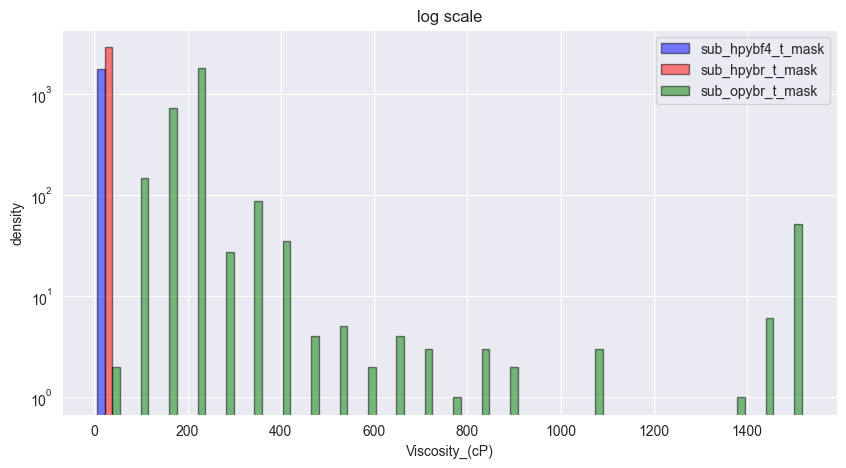

In [202]:
plt.figure(figsize=(10,5))

plt.hist([final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'],
         final_df[sub_hpybr_t_mask]['Viscosity_(cP)'],
         final_df[sub_opybr_t_mask]['Viscosity_(cP)']],
         ec='k', alpha=0.5, bins=25,  color=('b','r', 'g'),
         label=['sub_hpybf4_t_mask', 'sub_hpybr_t_mask', 'sub_opybr_t_mask'],
         log=True)

plt.xlabel('Viscosity_(cP)');
plt.ylabel('density')
plt.legend(loc='upper right'), plt.title('log scale')
plt.legend(['sub_hpybf4_t_mask', 'sub_hpybr_t_mask', 'sub_opybr_t_mask'])

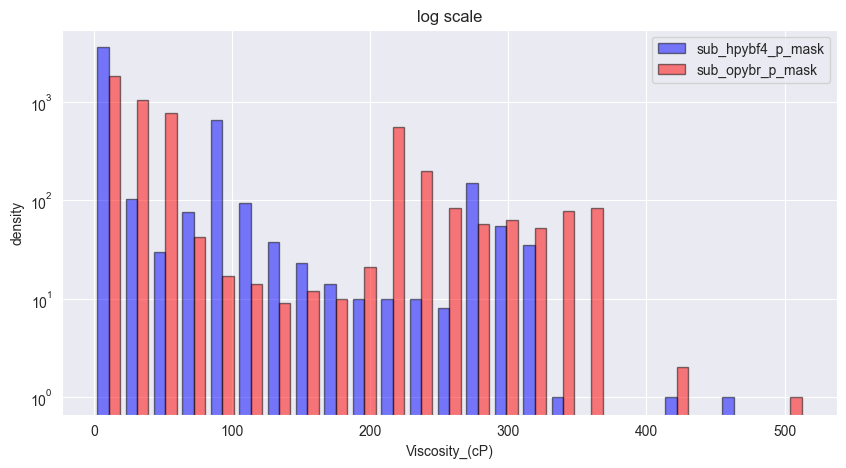

In [205]:
plt.figure(figsize=(10,5))

plt.hist([final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'],
         final_df[sub_opybr_p_mask]['Viscosity_(cP)']],
         ec='k', alpha=0.5, bins=25,  color=('b','r'),
         label=['sub_hpybf4_p_mask', 'sub_opybr_p_mask'],
         log=True)

plt.xlabel('Viscosity_(cP)');
plt.ylabel('density')
plt.legend(loc='upper right'), plt.title('log scale')
plt.legend(['sub_hpybf4_p_mask', 'sub_opybr_p_mask'])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001FEE2ACAF70> (for post_execute):


KeyboardInterrupt: 

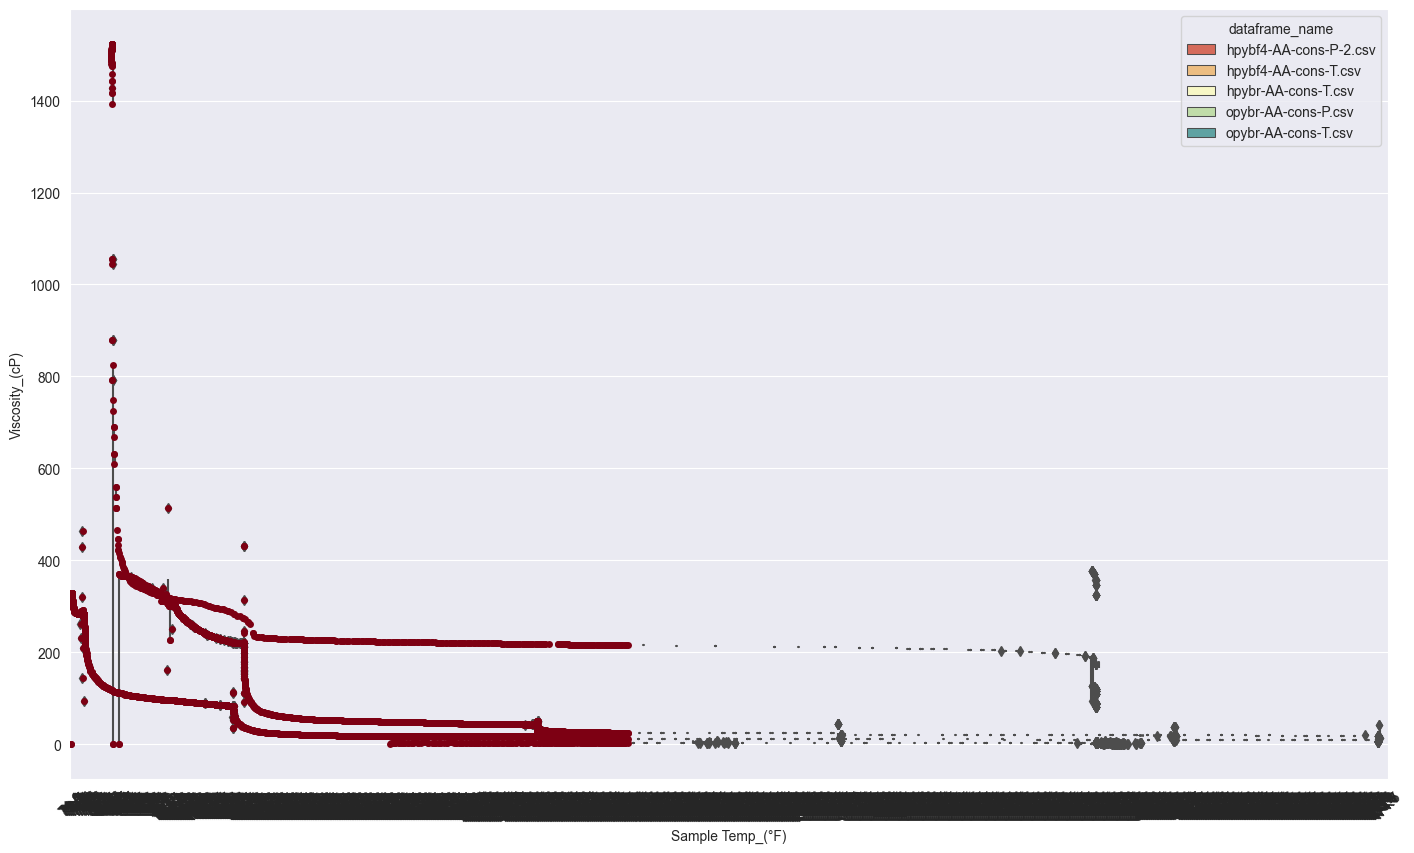

In [208]:
col1 = 'Sample Temp_(°F)'
col2_numer = 'Viscosity_(cP)'

plt.figure(figsize=(17,10))

ax = sns.boxplot(x=col1, y=col2_numer, data=final_df, palette="Spectral",
                 hue=final_df['dataframe_name'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

ax = sns.swarmplot(x=col1, y=col2_numer, data=final_df, color='#7d0013')
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [206]:
final_df.columns

Index(['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
       'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
       'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)',
       'dataframe_name'],
      dtype='object')